In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv('cleaned_df.csv',index_col=0)

In [3]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Prediction

In [4]:
#GET BASE ACCURACY
base = max(df['target'].mean(), (1-df['target'].mean()))
base

0.5445544554455446

## Logistic Regression

In [22]:
from sklearn import metrics

#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.8852459016393442
confusion matrix
[[23  4]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## KNN

In [23]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.819672131147541
confusion matrix
[[21  6]
 [ 5 29]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Decision Tree Classifier

In [26]:
# INSATNTIATE DECISION TREE MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Test Accuracy score:  0.7540983606557377
confusion matrix
[[19  8]
 [ 7 27]]


              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



## Random Forest

In [27]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8688524590163934
confusion matrix
[[23  4]
 [ 4 30]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## XGB

In [28]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, seed=25)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=metrics.accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# Compute the accuracy: accuracy
# checking accuracy
print('Test Accuracy score: ',xgb_acc_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

Test Accuracy score:  0.7540983606557377
confusion matrix
[[19  8]
 [ 7 27]]


              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



## Naive Bayes

In [30]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8688524590163934
confusion matrix
[[21  6]
 [ 2 32]]


              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



## Support Vector Classifier

In [31]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.8688524590163934
confusion matrix
[[22  5]
 [ 3 31]]


Accuracy of Support Vector Classifier: 0.8688524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [16]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

AttributeError: module 'xgboost' has no attribute 'feature_importances_'

## Plot ROC Curves

In [32]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_forest)
fpr_xgb, tpr_xgb, thresholds_log = roc_curve(y_test, y_pred_xgb)
fpr_nb, tpr_nb, thresholds_log = roc_curve(y_test, y_pred_nb)
fpr_svc, tpr_svc, thresholds_log = roc_curve(y_test, y_pred_svc)



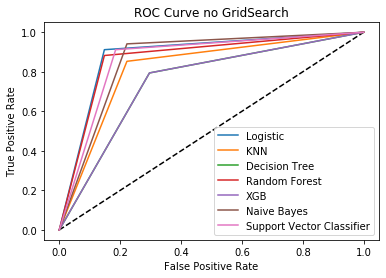

In [33]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_tree, tpr_tree,label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc,label = 'Random Forest')
plt.plot(fpr_xgb,tpr_xgb,label= 'XGB')
plt.plot(fpr_nb,tpr_nb,label= 'Naive Bayes')
plt.plot(fpr_svc,tpr_svc,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

In [34]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_pred_tree)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest)))
print("AUC XGB: {}".format(roc_auc_score(y_test, y_pred_xgb)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc)))



AUC Logistic: 0.8818082788671023
AUC KNN: 0.815359477124183
AUC Decision Tree: 0.7489106753812637
AUC Random Forest: 0.8671023965141612
AUC XGB: 0.7489106753812637
AUC Naive Bayes: 0.8594771241830065
AUC Support Vector Classifier: 0.8632897603485838


# Model Evaluation

In [35]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'], 'Accuracy': [lr_acc_score,
                    rfc_acc_score,xgb_acc_score,knn_acc_score,tree_acc_score,nb_acc_score, svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.885246
1,Random Forest,0.868852
2,Extreme Gradient Boost,0.754098
3,K-Nearest Neighbour,0.819672
4,Decision Tree,0.754098
5,Naive Bayes,0.868852
6,Support Vector Classifier,0.868852


# Ensembling

In [36]:
scv=StackingCVClassifier(classifiers=[logreg,nb,svc],meta_classifier=nb,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[24  3]
 [ 2 32]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# Grid Search CV

## LR Grid

In [ ]:
from sklearn.model_selection import GridSearchCV

#SET PARAMATER GRID
param_grid_log =  {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 4, 20)}
grid_search_log = GridSearchCV(estimator = logreg, param_grid = param_grid_log,cv = 7,scoring = 'f1', n_jobs = -1)

In [ ]:
grid_search_log.fit(X_train,y_train)
log_params = grid_search_log.best_params_
print(log_params)

In [ ]:
logreg_grid = LogisticRegression(**log_params)

logreg_grid.fit(X_train, y_train)

y_pred_log_grid = logreg_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_log_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_log_grid))

# KNN Grid

In [ ]:
#SET PARAMATER GRID
param_grid_knn = {'n_neighbors' : [15,17,19],
                 'weights':['uniform','distance'],
                 'metric' : ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 5, scoring = 'f1',n_jobs = -1)


In [ ]:
grid_search_knn.fit(X_train,y_train)
knn_params = grid_search_knn.best_params_
print(knn_params)

In [ ]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)
y_pred_knn_grid = knn_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_knn_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_knn_grid))

# Decision tree grid

In [ ]:
#SET PARAMATER GRID
param_grid_tree = { 'criterion' : ['gini', 'entropy'],
                   'max_depth' : [9,12,14],
                  'min_samples_leaf':[8,9,11], 'min_samples_split':[2,3,4,5],
                  }
grid_search_tree = GridSearchCV(estimator = tree, param_grid = param_grid_tree,cv = 7,scoring = 'f1', n_jobs = -1)

In [ ]:
grid_search_tree.fit(X_train,y_train)
tree_params = grid_search_tree.best_params_
print(tree_params)

In [ ]:
tree_grid = DecisionTreeClassifier(**tree_params)
tree_grid.fit(X_train, y_train)
y_pred_tree_grid = tree_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_tree_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_tree_grid))

# Random forest grid

In [ ]:
#SET PARAMATER GRID
param_grid_forest = { 
    'n_estimators': [75,100,125],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [ 18, 19, 21, 23],
    'max_depth': [9, 10, 12],
    'max_features': ['auto', 'log2']
    
}

grid_search_forest = GridSearchCV(estimator = rfc, param_grid = param_grid_forest,cv = 5,scoring = 'accuracy')

In [ ]:

grid_search_forest.fit(X_train,y_train)
forest_params = grid_search_forest.best_params_
print(forest_params)

In [ ]:
forest_grid = RandomForestClassifier(**forest_params)
forest_grid.fit(X_train, y_train)
y_pred_forest_grid = forest_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_forest_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_forest_grid))

# Ensemble models

In [ ]:
#ENSEMBLE MODEL WITHOUT WEIGHTS
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lr', logreg_grid),('rf', forest_grid),
                                              ('dt', tree_grid), ('kn',knn_grid)], voting='hard',n_jobs = -1 )

ensemble_model.fit(X_train, y_train)

ensemble_preds = ensemble_model.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, ensemble_preds))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, ensemble_preds))

In [ ]:

#ENSEMBLE MODEL WITH WEIGHTS
ensemble_model2 = VotingClassifier(estimators=[('lr', logreg_grid), ('rf', forest_grid), ('dt', tree_grid), ('kn',knn_grid)],
                  voting='soft',weights=[4, 2, 1,3])

ensemble_model2.fit(X_train, y_train)

ensemble_preds2 = ensemble_model2.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, ensemble_preds2))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, ensemble_preds2))

In [ ]:

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_log_g_prob = logreg_grid.predict_proba(X_test)[:,1]
y_knn_g_prob = knn_grid.predict_proba(X_test)[:,1]
y_tree_g_prob = tree_grid.predict_proba(X_test)[:,1]
y_rfc_g_prob = forest_grid.predict_proba(X_test)[:,1]
y_ens_prob = ensemble_model2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log_g, tpr_log_g, thresholds_log_g = roc_curve(y_test, y_log_g_prob)
fpr_knn_g, tpr_knn_g, thresholds_knn_g = roc_curve(y_test, y_knn_g_prob)
fpr_tree_g, tpr_tree_g, thresholds_tree_g = roc_curve(y_test, y_tree_g_prob)
fpr_rfc_g, tpr_rfc_g, thresholds_rfc_g = roc_curve(y_test, y_rfc_g_prob)
fpr_ens, tpr_ens, thresholds_ens = roc_curve(y_test, y_ens_prob)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_g, tpr_log_g,label = 'Logistic')
plt.plot(fpr_knn_g, tpr_knn_g,label = 'KNN')
plt.plot(fpr_tree_g, tpr_tree_g,label = 'Decision Tree')
plt.plot(fpr_rfc_g, tpr_rfc_g,label = 'Random Forest')
plt.plot(fpr_ens, tpr_ens,label = 'Ensemble')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with GridSearch')
plt.show()

In [ ]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_log_g_prob)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_knn_g_prob)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_tree_g_prob)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_rfc_g_prob)))
print("AUC Ensemble: {}".format(roc_auc_score(y_test, y_ens_prob)))

In [ ]:
print(confusion_matrix(y_test, ensemble_preds2))
print(classification_report(y_test, ensemble_preds2))

In [ ]:
cm = confusion_matrix(y_test, ensemble_preds2)
classes = ['No Disease', 'Disease']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
abs(base-metrics.accuracy_score(y_test, ensemble_preds2))/base
